In [1]:
import numpy as np
import pandas as pd
from matplotlib import pylab as plt
from importlib import reload
plt.rcParams["legend.loc"] = "upper left"
plt.rcParams['text.usetex'] = True

from files.gradient_approximation import *
from files.optimizers import *
from files.sets import *
from files.utils import *
from files.run_experiments import *

%load_ext autoreload
%autoreload 2

## None-stochastic FW LogReg on L1-ball (Mushrooms)

In [2]:
func_name = "logreg"
d = 112
seed = 42
sigma = 0
sett = L1Ball(radius=1)
L = 5.25

args = init_experiment(func_name, d=d)

x_0 = np.random.random(size=d)
x_0 = x_0 / np.linalg.norm(x_0)

In [3]:
def learning_rate(k):
    return 1 / L

In [4]:
TrueGradient = TrueGradientApproximator(args=args) 
GD = GDOptimizer(TrueGradient, learning_rate, x_0, sett, max_oracle_calls=10**3)
GD.optimize()

100%|███████████████████████████████████████| 1000/1000 [00:16<00:00, 59.95it/s]


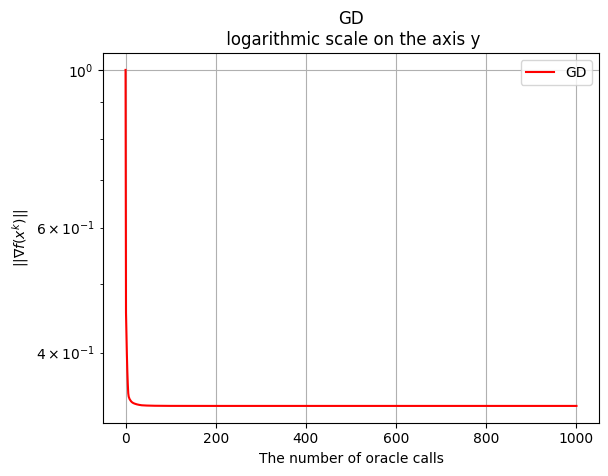

0.40839106094557986


In [5]:
make_err_plot([GD], title="GD", labels=["GD"])
x_sol = GD.x_curr
print(np.linalg.norm(x_sol))

In [6]:
def learning_rate_jaguar(k):
    return (np.sqrt(k) + 1) / (k + L)

def learning_rate_lame(k):
    return (2 * np.sqrt(k) + 1) / (k + L)

def learning_rate_turtle(k):
    return 1 / (k + L)

In [7]:
oracle = ZO_oracle(func_name, sigma, oracle_mode="tpf", args=args)

In [8]:
Jaguar = JaguarApproximator(oracle, gamma=1e-5)
Lame = LameApproximator(oracle, gamma=1e-5)
Turtle = TurtleApproximator(oracle, gamma=1e-5)

approx_list = [Jaguar, Lame, Turtle]
lr_list = [learning_rate_jaguar, learning_rate_lame, learning_rate_turtle]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = FWOptimizer(approximator, lr, x_0, sett, x_sol=x_sol, max_oracle_calls=10**4)
    opt.optimize()
    optimizers_list.append(opt)

100%|███████████████████████████████████████████| 44/44 [00:22<00:00,  1.97it/s]


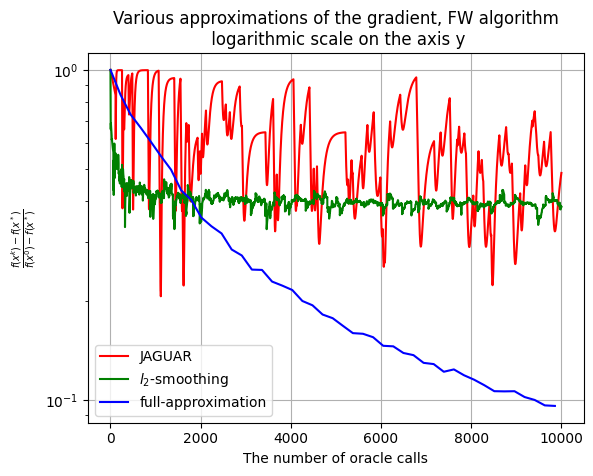

In [9]:
make_err_plot(optimizers_list, save_name="None_stochastics_FW_LogReg_L1_Mushrooms")

## None-stochastic FW LogReg on L1-ball (MNIST)

In [10]:
func_name = "logreg"
d = 719
seed = 42
sigma = 0
sett = L1Ball(radius=1)
L = 5.25

args = init_experiment(func_name, dataset="MNIST", d=d)

x_0 = np.random.random(size=d)
x_0 = x_0 / np.linalg.norm(x_0)

In [11]:
def learning_rate(k):
    return 1 / L

In [12]:
TrueGradient = TrueGradientApproximator(args=args) 
GD = GDOptimizer(TrueGradient, learning_rate, x_0, sett, max_oracle_calls=10**3)
GD.optimize()

100%|███████████████████████████████████████| 1000/1000 [05:53<00:00,  2.83it/s]


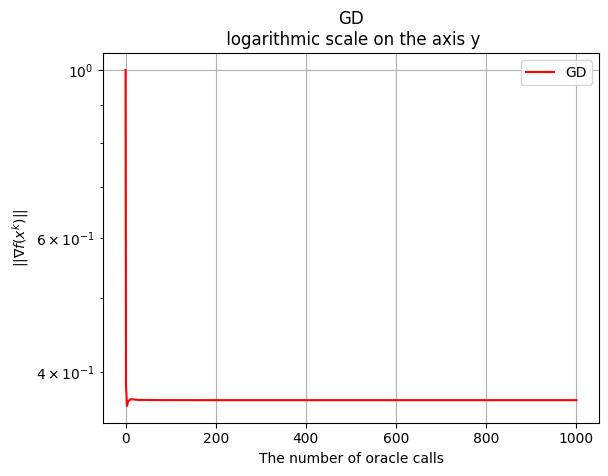

0.2326679419368076


In [13]:
make_err_plot([GD], title="GD", labels=["GD"])
x_sol = GD.x_curr
print(np.linalg.norm(x_sol))

In [14]:
def learning_rate_jaguar(k):
    return 1 / (k + 200)

def learning_rate_lame(k):
    return 1 / (k + 200)

def learning_rate_turtle(k):
    return 1 / (k + 10)

In [15]:
oracle = ZO_oracle(func_name, sigma, oracle_mode="tpf", args=args)

In [16]:
Jaguar = JaguarApproximator(oracle, gamma=1e-5)
Lame = LameApproximator(oracle, gamma=1e-5)
Turtle = TurtleApproximator(oracle, gamma=1e-5)

approx_list = [Jaguar, Lame, Turtle]
lr_list = [learning_rate_jaguar, learning_rate_lame, learning_rate_turtle]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = FWOptimizer(approximator, lr, x_0, sett, x_sol=x_sol, max_oracle_calls=10**4)
    opt.optimize()
    optimizers_list.append(opt)

100%|█████████████████████████████████████████████| 6/6 [06:19<00:00, 63.28s/it]


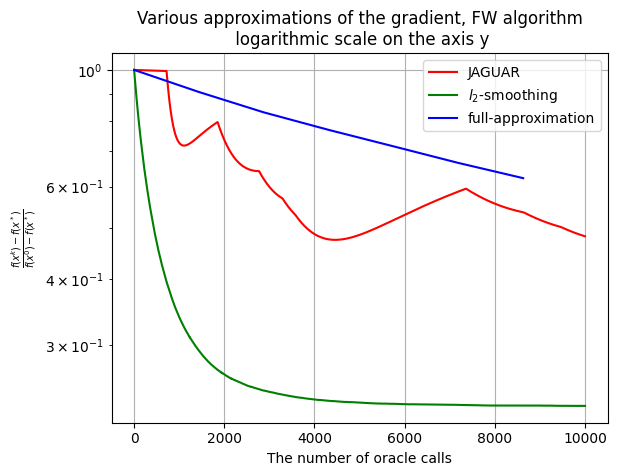

In [17]:
make_err_plot(optimizers_list, save_name="None_stochastics_FW_LogReg_L1_MNIST")

## None-stochastic FW Reg on L1-ball

In [18]:
func_name = "quadratic"
d = 200
seed = 42
sigma = 0
sett = L1Ball(radius=1)
L = 1000
mu = 1

args = init_experiment(func_name, d=d, L=L, mu=mu)

x_0 = np.random.random(size=d)
x_0 = x_0 / np.linalg.norm(x_0)

In [19]:
def learning_rate(k):
    return 1 / L

In [21]:
TrueGradient = TrueGradientApproximator(args=args) 
GD = GDOptimizer(TrueGradient, learning_rate, x_0, sett, max_oracle_calls=10**4)
GD.optimize()

100%|█████████████████████████████████████| 10000/10000 [02:26<00:00, 68.28it/s]


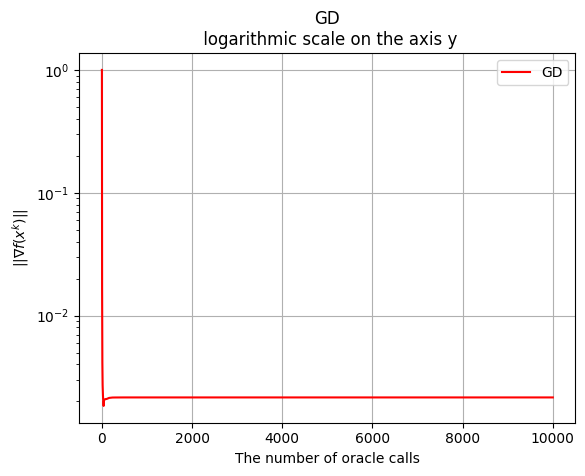

0.08946465725835649


In [22]:
make_err_plot([GD], title="GD", labels=["GD"])
x_sol = GD.x_curr
print(np.linalg.norm(x_sol))

In [23]:
def learning_rate_jaguar(k):
    return 1 / (k + 100)

def learning_rate_lame(k):
    return 1 / (k + 20)

def learning_rate_turtle(k):
    return 1 / (k + 100)

In [24]:
oracle = ZO_oracle(func_name, sigma, oracle_mode="tpf", args=args)

In [25]:
Jaguar = JaguarApproximator(oracle, gamma=1e-5)
Lame = LameApproximator(oracle, gamma=1e-5)
Turtle = TurtleApproximator(oracle, gamma=1e-5)

approx_list = [Jaguar, Lame, Turtle]
lr_list = [learning_rate_jaguar, learning_rate_lame, learning_rate_turtle]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = FWOptimizer(approximator, lr, x_0, sett, x_sol=x_sol, max_oracle_calls=10**4)
    opt.optimize()
    optimizers_list.append(opt)

100%|███████████████████████████████████████████| 25/25 [02:51<00:00,  6.85s/it]


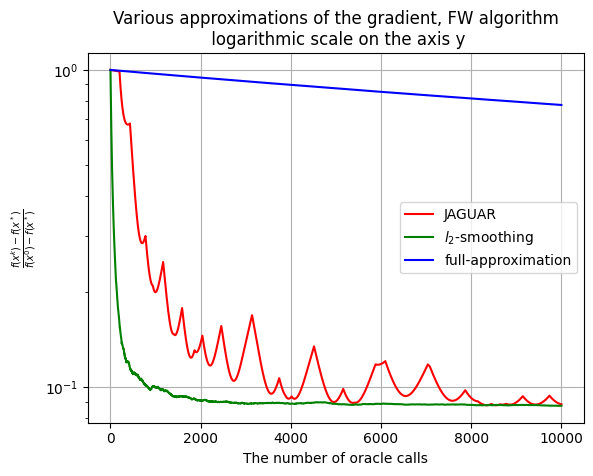

In [26]:
make_err_plot(optimizers_list, save_name="None_stochastics_FW_Reg_L1")

## None-stochastic FW SVM on L1-ball (Mushrooms)

In [27]:
func_name = "SVM"
d = 112
seed = 42
sigma = 0
sett = L1Ball(radius=1)
L = 5.25

args = init_experiment(func_name, d=d, alpha=2)

x_0 = np.random.random(size=d+1)
x_0 = x_0 / np.linalg.norm(x_0)

In [28]:
def learning_rate_jaguar(k):
    return 1 / (k + 200)

def learning_rate_lame(k):
    return 1 / (k + 200)

def learning_rate_turtle(k):
    return 1 / (k + 10)

In [29]:
oracle = ZO_oracle(func_name, sigma, oracle_mode="tpf", args=args)

In [30]:
Jaguar = JaguarApproximator(oracle, gamma=1e-5)
Lame = LameApproximator(oracle, gamma=1e-5)
Turtle = TurtleApproximator(oracle, gamma=1e-5)

approx_list = [Jaguar, Lame, Turtle]
lr_list = [learning_rate_jaguar, learning_rate_lame, learning_rate_turtle]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = FWOptimizer(approximator, lr, x_0, sett, max_oracle_calls=10**4)
    opt.optimize()
    optimizers_list.append(opt)

100%|███████████████████████████████████████████| 44/44 [02:51<00:00,  3.91s/it]


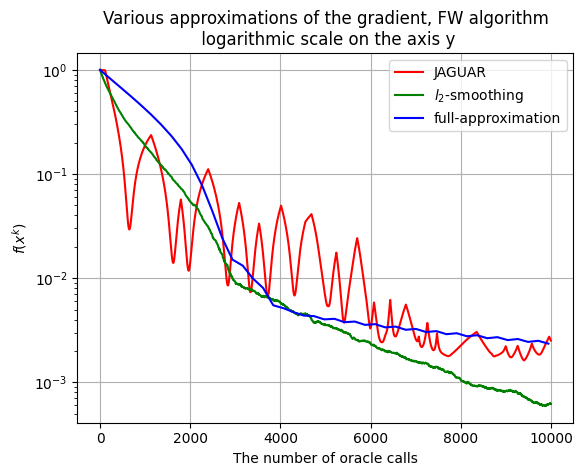

In [31]:
make_err_plot(optimizers_list, save_name="None_stochastics_FW_SVM_L1_Mushrooms")

## None-stochastic FW SVM on L1-ball (MNIST)

In [32]:
func_name = "SVM"
d = 719
seed = 42
sigma = 0
sett = L1Ball(radius=0.5)
L = 5.25

args = init_experiment(func_name, dataset="MNIST", d=d, alpha=2)

x_0 = np.random.random(size=d+1)
x_0 = x_0 / np.linalg.norm(x_0)

In [33]:
def learning_rate_jaguar(k):
    return 1 / (k + 400)

def learning_rate_lame(k):
    return 1 / (k + 500)

def learning_rate_turtle(k):
    return (np.sqrt(k) + 1) / (k + 1)

In [34]:
oracle = ZO_oracle(func_name, sigma, oracle_mode="tpf", args=args)

In [35]:
Jaguar = JaguarApproximator(oracle, gamma=1e-5)
Lame = LameApproximator(oracle, gamma=1e-5)
Turtle = TurtleApproximator(oracle, gamma=1e-5)

approx_list = [Jaguar, Lame, Turtle]
lr_list = [learning_rate_jaguar, learning_rate_lame, learning_rate_turtle]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = FWOptimizer(approximator, lr, x_0, sett, max_oracle_calls=10**4)
    opt.optimize()
    optimizers_list.append(opt)

100%|█████████████████████████████████████████████| 6/6 [02:35<00:00, 25.95s/it]


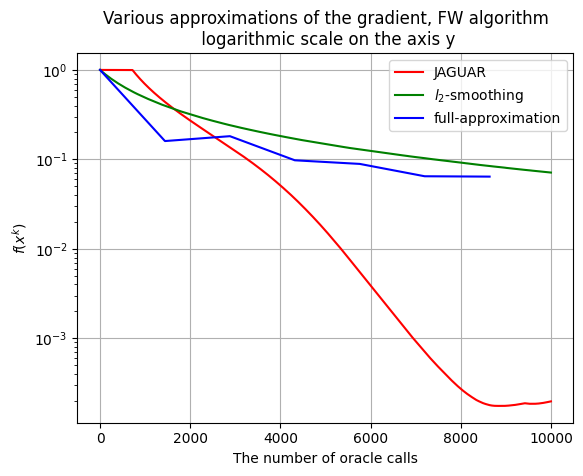

In [36]:
make_err_plot(optimizers_list, save_name="None_stochastics_FW_SVM_L1_MNIST")

## Stochastic OPF FW LogReg on L1-ball (Mushrooms)

In [37]:
func_name = "logreg"
d = 112
seed = 42
sigma = 1
sett = L1Ball(radius=1)
L = 5.25

args = init_experiment(func_name, d=d)

x_0 = np.random.random(size=d)
x_0 = x_0 / np.linalg.norm(x_0)

In [38]:
def learning_rate(k):
    return 1 / L

In [39]:
TrueGradient = TrueGradientApproximator(args=args) 
GD = GDOptimizer(TrueGradient, learning_rate, x_0, sett, max_oracle_calls=10**3)
GD.optimize()

100%|███████████████████████████████████████| 1000/1000 [00:58<00:00, 16.98it/s]


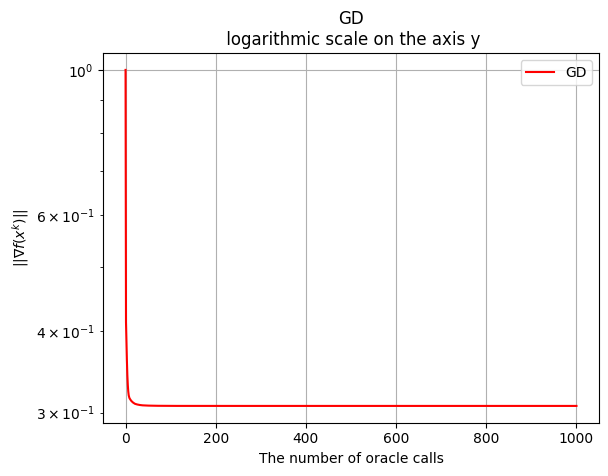

0.4083910609455799


In [40]:
make_err_plot([GD], title="GD", labels=["GD"])
x_sol = GD.x_curr
print(np.linalg.norm(x_sol))

In [41]:
def learning_rate_jaguar(k):
    return 1 / (k + 50)

def learning_rate_lame(k):
    return 1 / (k + 20)

def learning_rate_turtle(k):
    return 1 / (k + 20)

In [42]:
def momentum_k(k):
    return 2 * k / (2 * k + 100)

In [43]:
oracle = ZO_oracle(func_name, sigma, oracle_mode="opf", args=args)

In [44]:
Jaguar = JaguarApproximator(oracle, momentum_k=momentum_k, gamma=1e-5)
Lame = LameApproximator(oracle, gamma=1e-5)
Turtle = TurtleApproximator(oracle, gamma=1e-5)

approx_list = [Jaguar, Lame, Turtle]
lr_list = [learning_rate_jaguar, learning_rate_lame, learning_rate_turtle]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = FWOptimizer(approximator, lr, x_0, sett, x_sol=x_sol, max_oracle_calls=5 * 10**3)
    opt.optimize()
    optimizers_list.append(opt)

100%|███████████████████████████████████████████| 22/22 [01:52<00:00,  5.10s/it]


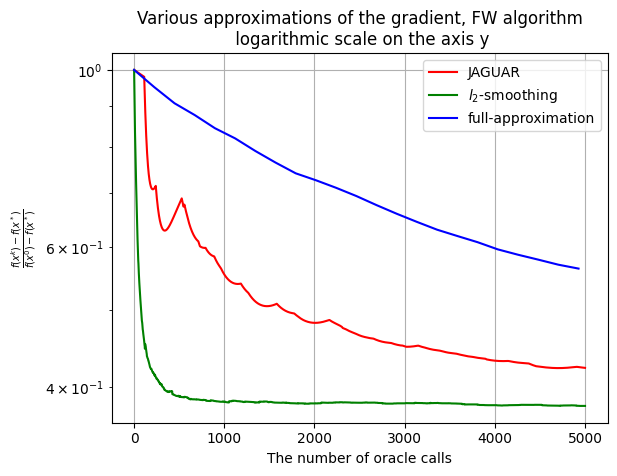

In [45]:
make_err_plot(optimizers_list, save_name="Stochastics_OPF_FW_LogReg_L1_Mushrooms")

## Stochastic OPF FW LogReg on L1-ball (MNIST)

In [46]:
func_name = "logreg"
d = 719
seed = 42
sigma = 1
sett = L1Ball(radius=1)
L = 5.25

args = init_experiment(func_name, dataset="MNIST", d=d)

x_0 = np.random.random(size=d)
x_0 = x_0 / np.linalg.norm(x_0)

In [47]:
def learning_rate(k):
    return 1 / L

In [48]:
TrueGradient = TrueGradientApproximator(args=args) 
GD = GDOptimizer(TrueGradient, learning_rate, x_0, sett, max_oracle_calls=10**3)
GD.optimize()

100%|███████████████████████████████████████| 1000/1000 [10:17<00:00,  1.62it/s]


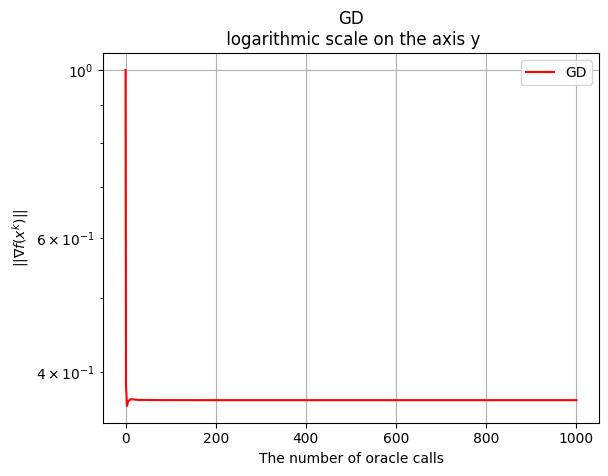

0.2326679419368076


In [49]:
make_err_plot([GD], title="GD", labels=["GD"])
x_sol = GD.x_curr
print(np.linalg.norm(x_sol))

In [50]:
def learning_rate_jaguar(k):
    return 1 / (k + 500)

def learning_rate_lame(k):
    return 1 / (k + 200)

def learning_rate_turtle(k):
    return 1 / (k + 20)

In [51]:
def momentum_k(k):
    return 2 * k / (2 * k + 100)

In [52]:
oracle = ZO_oracle(func_name, sigma, oracle_mode="opf", args=args)

In [53]:
Jaguar = JaguarApproximator(oracle, momentum_k=momentum_k, gamma=1e-5)
Lame = LameApproximator(oracle, gamma=1e-5)
Turtle = TurtleApproximator(oracle, gamma=1e-5)

approx_list = [Jaguar, Lame, Turtle]
lr_list = [learning_rate_jaguar, learning_rate_lame, learning_rate_turtle]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = FWOptimizer(approximator, lr, x_0, sett, x_sol=x_sol, max_oracle_calls=5 * 10**3)
    opt.optimize()
    optimizers_list.append(opt)

100%|█████████████████████████████████████████████| 3/3 [03:06<00:00, 62.09s/it]


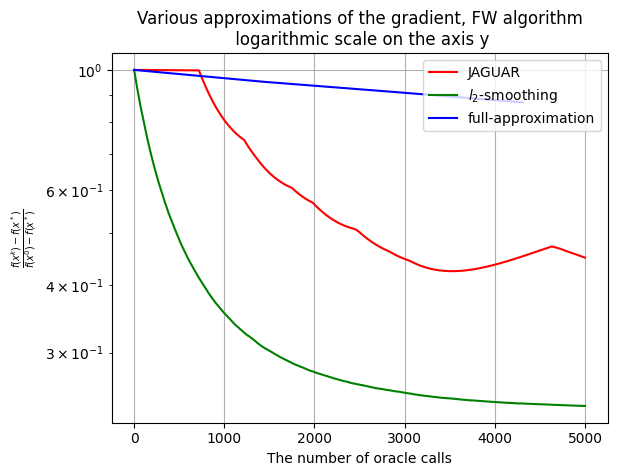

In [54]:
make_err_plot(optimizers_list, save_name="Stochastics_OPF_FW_LogReg_L1_MNIST")

## Stochastic OPF FW Reg on L1-ball

In [55]:
func_name = "quadratic"
d = 200
seed = 101
sigma = 1
sett = L1Ball(radius=1)
L = 1000
mu = 1

args = init_experiment(func_name, d=d, L=L, mu=mu)

x_0 = np.random.random(size=d)
x_0 = x_0 / np.linalg.norm(x_0)

In [56]:
def learning_rate(k):
    return 1 / L

In [57]:
TrueGradient = TrueGradientApproximator(args=args) 
GD = GDOptimizer(TrueGradient, learning_rate, x_0, sett, max_oracle_calls=10**4)
GD.optimize()

100%|█████████████████████████████████████| 10000/10000 [07:14<00:00, 22.99it/s]


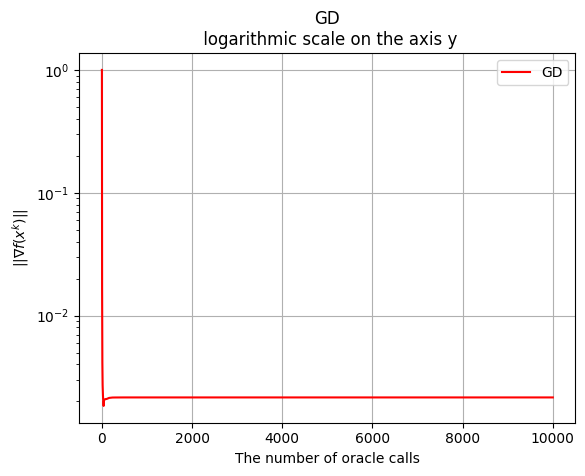

0.08946465725835649


In [58]:
make_err_plot([GD], title="GD", labels=["GD"])
x_sol = GD.x_curr
print(np.linalg.norm(x_sol))

In [59]:
def learning_rate_jaguar(k):
    return 1 / (k + 3)

def learning_rate_lame(k):
    return 1 / (3 * k + 6)

def learning_rate_turtle(k):
    return (np.sqrt(k) + 1) / (2 * k + 6)

In [60]:
def momentum_k(k):
    return 0.95 * k / (k + 10)

In [61]:
oracle = ZO_oracle(func_name, sigma, oracle_mode="opf", args=args)

In [62]:
Jaguar = JaguarApproximator(oracle, momentum_k=momentum_k, gamma=1e-5)
Lame = LameApproximator(oracle, gamma=1e-5)
Turtle = TurtleApproximator(oracle, gamma=1e-5)

approx_list = [Jaguar, Lame, Turtle]
lr_list = [learning_rate_jaguar, learning_rate_lame, learning_rate_turtle]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = FWOptimizer(approximator, lr, x_0, sett, x_sol=x_sol, max_oracle_calls=10**4)
    opt.optimize()
    optimizers_list.append(opt)

100%|███████████████████████████████████████████| 25/25 [03:00<00:00,  7.23s/it]


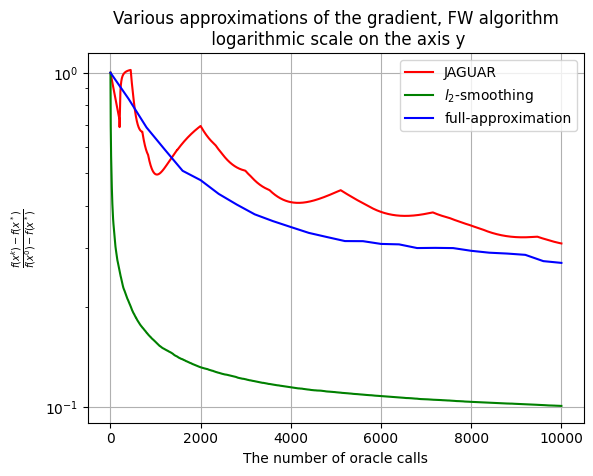

In [63]:
make_err_plot(optimizers_list, save_name="Stochastics_OPF_FW_Reg_L1")

## Stochastic OPF FW SVM on L1-ball (Mushrooms)

In [64]:
func_name = "SVM"
d = 112
seed = 101
sigma = 1
sett = L1Ball(radius=1)

args = init_experiment(func_name, d=d, alpha=2)

x_0 = np.random.random(size=d+1)
x_0 = x_0 / np.linalg.norm(x_0)

In [65]:
def learning_rate_jaguar(k):
    return 1 / (k + 30)

def learning_rate_lame(k):
    return 1 / (3 * k + 6)

def learning_rate_turtle(k):
    return (np.sqrt(k) + 1) / (2 * k + 6)

In [66]:
def momentum_k(k):
    return 0.95 * k / (k + 10)

In [67]:
oracle = ZO_oracle(func_name, sigma, oracle_mode="opf", args=args)

In [68]:
Jaguar = JaguarApproximator(oracle, momentum_k=momentum_k, gamma=1e-5)
Lame = LameApproximator(oracle, gamma=1e-5)
Turtle = TurtleApproximator(oracle, gamma=1e-5)

approx_list = [Jaguar, Lame, Turtle]
lr_list = [learning_rate_jaguar, learning_rate_lame, learning_rate_turtle]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = FWOptimizer(approximator, lr, x_0, sett, max_oracle_calls=10**4)
    opt.optimize()
    optimizers_list.append(opt)

100%|███████████████████████████████████████████| 44/44 [03:04<00:00,  4.19s/it]


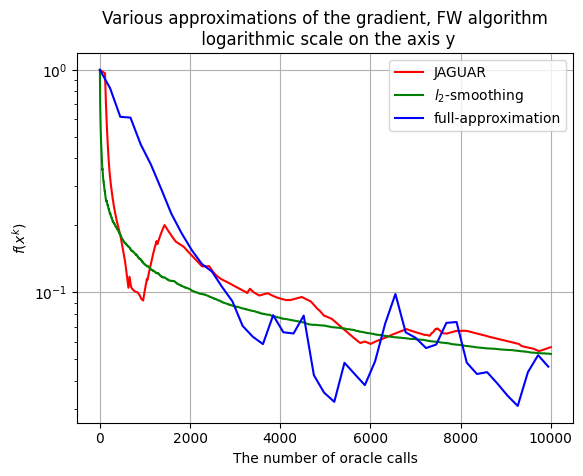

In [69]:
make_err_plot(optimizers_list, save_name="Stochastics_OPF_FW_SVM_L1_Mushrooms")

## Stochastic OPF FW SVM on L1-ball (MNIST)

In [70]:
func_name = "SVM"
d = 719
seed = 101
sigma = 1
sett = L1Ball(radius=1)

args = init_experiment(func_name, dataset="MNIST", d=d, alpha=2)

x_0 = np.random.random(size=d+1)
x_0 = x_0 / np.linalg.norm(x_0)

In [71]:
def learning_rate_jaguar(k):
    return (np.sqrt(k) + 1) / (k + 30)

def learning_rate_lame(k):
    return 1 / (3 * k + 6)

def learning_rate_turtle(k):
    return (np.sqrt(k) + 1) / (2 * k + 6)

In [72]:
def momentum_k(k):
    return 0.95 * k / (k + 10)

In [73]:
oracle = ZO_oracle(func_name, sigma, oracle_mode="opf", args=args)

In [74]:
Jaguar = JaguarApproximator(oracle, momentum_k=momentum_k, gamma=1e-5)
Lame = LameApproximator(oracle, gamma=1e-5)
Turtle = TurtleApproximator(oracle, gamma=1e-5)

approx_list = [Jaguar, Lame, Turtle]
lr_list = [learning_rate_jaguar, learning_rate_lame, learning_rate_turtle]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = FWOptimizer(approximator, lr, x_0, sett, max_oracle_calls=10**4)
    opt.optimize()
    optimizers_list.append(opt)

100%|█████████████████████████████████████████████| 6/6 [02:43<00:00, 27.26s/it]


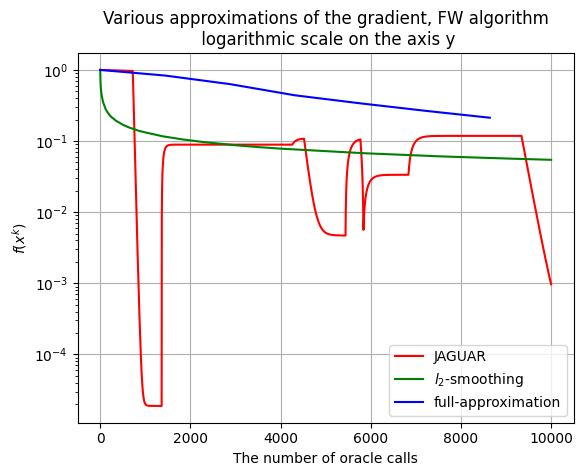

In [75]:
make_err_plot(optimizers_list, save_name="Stochastics_OPF_FW_SVM_L1_MNIST")

## Stochastic TPF FW LogReg on L1-ball (Mushrooms)

In [76]:
func_name = "logreg"
d = 112
seed = 42
sigma = 1
sett = L1Ball(radius=1)
L = 5.25

args = init_experiment(func_name, d=d)

x_0 = np.random.random(size=d)
x_0 = x_0 / np.linalg.norm(x_0)

In [77]:
def learning_rate(k):
    return 1 / L

In [78]:
TrueGradient = TrueGradientApproximator(args=args) 
GD = GDOptimizer(TrueGradient, learning_rate, x_0, sett, max_oracle_calls=10**3)
GD.optimize()

100%|███████████████████████████████████████| 1000/1000 [01:00<00:00, 16.66it/s]


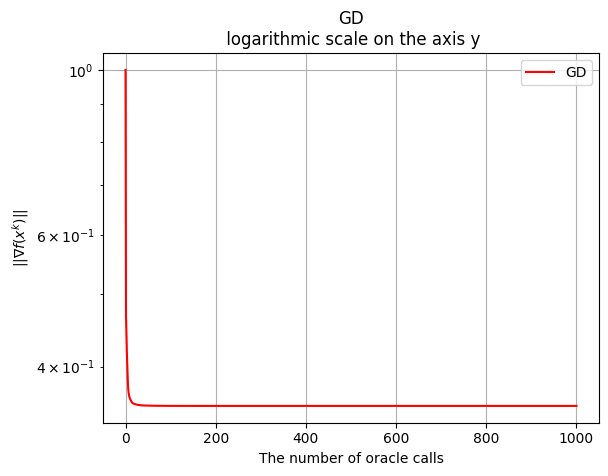

0.40839106094557986


In [79]:
make_err_plot([GD], title="GD", labels=["GD"])
x_sol = GD.x_curr
print(np.linalg.norm(x_sol))

In [80]:
def learning_rate_jaguar(k):
    return 1 / (k + 50)

def learning_rate_lame(k):
    return 1 / (k + 20)

def learning_rate_turtle(k):
    return 1 / (k + 20)

In [81]:
def momentum_k(k):
    return 2 * k / (2 * k + 100)

In [82]:
oracle = ZO_oracle(func_name, sigma, oracle_mode="tpf", args=args)

In [83]:
Jaguar = JaguarApproximator(oracle, momentum_k=momentum_k, gamma=1e-5)
Lame = LameApproximator(oracle, gamma=1e-5)
Turtle = TurtleApproximator(oracle, gamma=1e-5)

approx_list = [Jaguar, Lame, Turtle]
lr_list = [learning_rate_jaguar, learning_rate_lame, learning_rate_turtle]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = FWOptimizer(approximator, lr, x_0, sett, x_sol=x_sol, max_oracle_calls=5 * 10**3)
    opt.optimize()
    optimizers_list.append(opt)

100%|███████████████████████████████████████████| 22/22 [01:51<00:00,  5.07s/it]


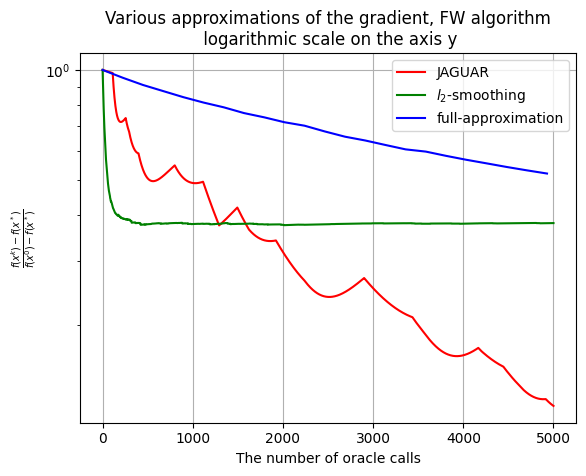

In [84]:
make_err_plot(optimizers_list, save_name="Stochastics_TPF_FW_LogReg_L_Mushrooms")

## Stochastic TPF FW LogReg on L1-ball (MNIST)

In [85]:
func_name = "logreg"
d = 719
seed = 42
sigma = 1
sett = L1Ball(radius=1)
L = 5.25

args = init_experiment(func_name, dataset="MNIST", d=d)

x_0 = np.random.random(size=d)
x_0 = x_0 / np.linalg.norm(x_0)

In [86]:
def learning_rate(k):
    return 1 / L

In [87]:
TrueGradient = TrueGradientApproximator(args=args) 
GD = GDOptimizer(TrueGradient, learning_rate, x_0, sett, max_oracle_calls=10**3)
GD.optimize()

100%|███████████████████████████████████████| 1000/1000 [10:16<00:00,  1.62it/s]


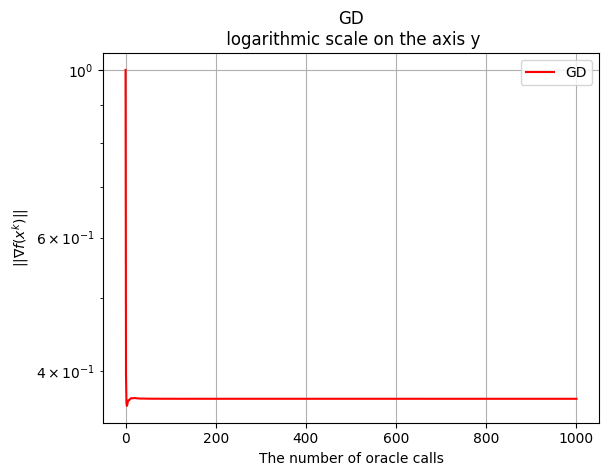

0.23266794193680757


In [88]:
make_err_plot([GD], title="GD", labels=["GD"])
x_sol = GD.x_curr
print(np.linalg.norm(x_sol))

In [89]:
def learning_rate_jaguar(k):
    return 1 / (k + 500)

def learning_rate_lame(k):
    return 1 / (k + 200)

def learning_rate_turtle(k):
    return 1 / (k + 20)

In [90]:
def momentum_k(k):
    return 2 * k / (2 * k + 100)

In [91]:
oracle = ZO_oracle(func_name, sigma, oracle_mode="tpf", args=args)

In [92]:
Jaguar = JaguarApproximator(oracle, momentum_k=momentum_k, gamma=1e-5)
Lame = LameApproximator(oracle, gamma=1e-5)
Turtle = TurtleApproximator(oracle, gamma=1e-5)

approx_list = [Jaguar, Lame, Turtle]
lr_list = [learning_rate_jaguar, learning_rate_lame, learning_rate_turtle]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = FWOptimizer(approximator, lr, x_0, sett, x_sol=x_sol, max_oracle_calls=5 * 10**3)
    opt.optimize()
    optimizers_list.append(opt)

100%|█████████████████████████████████████████████| 3/3 [03:00<00:00, 60.09s/it]


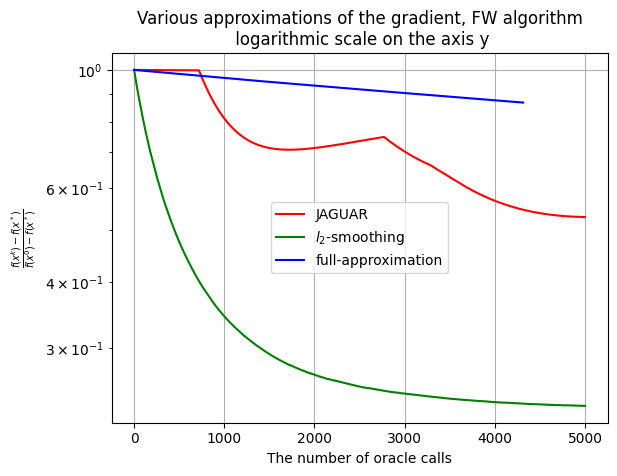

In [93]:
make_err_plot(optimizers_list, save_name="Stochastics_TPF_FW_LogReg_L1_MNIST")

## Stochastic TPF FW Reg on L1-ball

In [94]:
func_name = "quadratic"
d = 200
seed = 101
sigma = 1
sett = L1Ball(radius=1)
L = 1000
mu = 1

args = init_experiment(func_name, d=d, L=L, mu=mu)

x_0 = np.random.random(size=d)
x_0 = x_0 / np.linalg.norm(x_0)

In [95]:
def learning_rate(k):
    return 1 / L

In [96]:
TrueGradient = TrueGradientApproximator(args=args) 
GD = GDOptimizer(TrueGradient, learning_rate, x_0, sett, max_oracle_calls=10**4)
GD.optimize()

100%|█████████████████████████████████████| 10000/10000 [01:48<00:00, 92.49it/s]


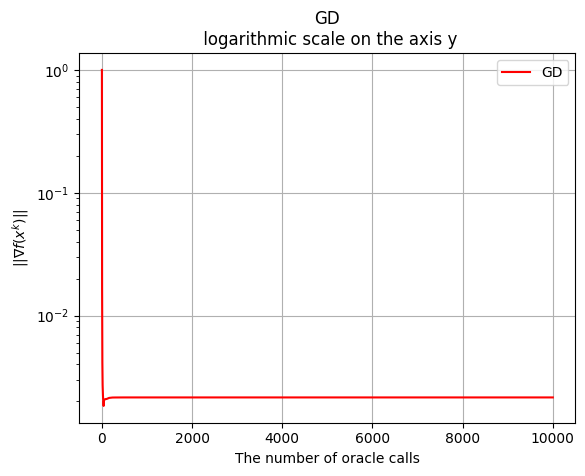

0.08946465725835649


In [97]:
make_err_plot([GD], title="GD", labels=["GD"])
x_sol = GD.x_curr
print(np.linalg.norm(x_sol))

In [98]:
def learning_rate_jaguar(k):
    return 1 / (k + 3)

def learning_rate_lame(k):
    return 1 / (3 * k + 6)

def learning_rate_turtle(k):
    return (np.sqrt(k) + 1) / (2 * k + 6)

In [99]:
def momentum_k(k):
    return 0.95 * k / (k + 10)

In [100]:
oracle = ZO_oracle(func_name, sigma, oracle_mode="tpf", args=args)

In [101]:
Jaguar = JaguarApproximator(oracle, momentum_k=momentum_k, gamma=1e-5)
Lame = LameApproximator(oracle, gamma=1e-5)
Turtle = TurtleApproximator(oracle, gamma=1e-5)

approx_list = [Jaguar, Lame, Turtle]
lr_list = [learning_rate_jaguar, learning_rate_lame, learning_rate_turtle]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = FWOptimizer(approximator, lr, x_0, sett, x_sol=x_sol, max_oracle_calls=10**4)
    opt.optimize()
    optimizers_list.append(opt)

100%|███████████████████████████████████████████| 25/25 [00:00<00:00, 49.73it/s]


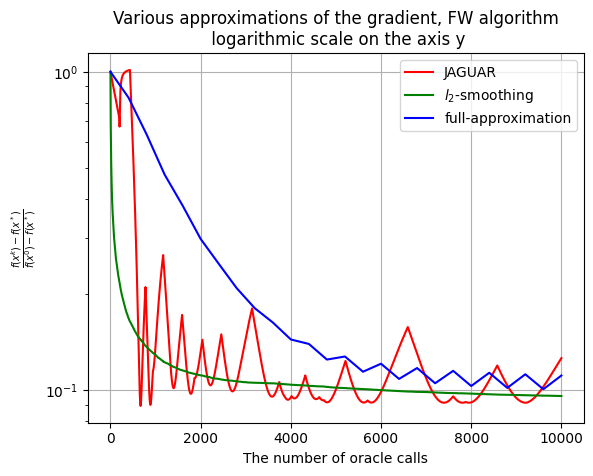

In [102]:
make_err_plot(optimizers_list, save_name="Stochastics_TPF_FW_Reg_L1")

## Stochastic TPF FW SVM on L1-ball (Mushrooms)

In [103]:
func_name = "SVM"
d = 112
seed = 101
sigma = 1
sett = L1Ball(radius=1)

args = init_experiment(func_name, d=d, alpha=2)

x_0 = np.random.random(size=d+1)
x_0 = x_0 / np.linalg.norm(x_0)

In [104]:
def learning_rate_jaguar(k):
    return 1 / (k + 30)

def learning_rate_lame(k):
    return 1 / (3 * k + 6)

def learning_rate_turtle(k):
    return (np.sqrt(k) + 1) / (2 * k + 6)

In [105]:
def momentum_k(k):
    return 0.95 * k / (k + 10)

In [106]:
oracle = ZO_oracle(func_name, sigma, oracle_mode="tpf", args=args)

In [107]:
Jaguar = JaguarApproximator(oracle, momentum_k=momentum_k, gamma=1e-5)
Lame = LameApproximator(oracle, gamma=1e-5)
Turtle = TurtleApproximator(oracle, gamma=1e-5)

approx_list = [Jaguar, Lame, Turtle]
lr_list = [learning_rate_jaguar, learning_rate_lame, learning_rate_turtle]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = FWOptimizer(approximator, lr, x_0, sett, max_oracle_calls=10**4)
    opt.optimize()
    optimizers_list.append(opt)

100%|███████████████████████████████████████████| 44/44 [00:01<00:00, 32.04it/s]


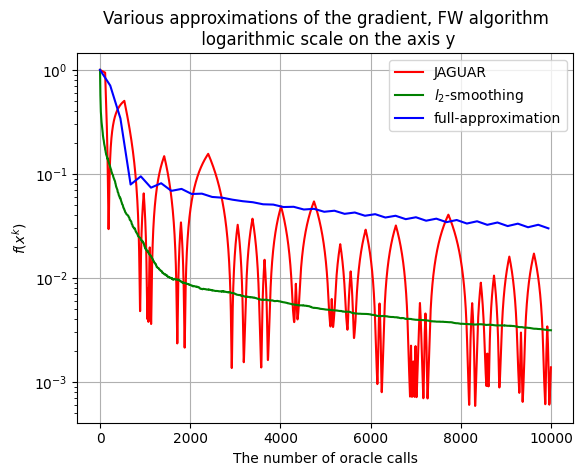

In [108]:
make_err_plot(optimizers_list, save_name="Stochastics_TPF_FW_SVM_L1_Mushrooms")

## Stochastic TPF FW SVM on L1-ball (MNIST)

In [109]:
func_name = "SVM"
d = 719
seed = 101
sigma = 1
sett = L1Ball(radius=1)

args = init_experiment(func_name, dataset="MNIST", d=d, alpha=2)

x_0 = np.random.random(size=d+1)
x_0 = x_0 / np.linalg.norm(x_0)

In [110]:
def learning_rate_jaguar(k):
    return (np.sqrt(k) + 1) / (k + 30)

def learning_rate_lame(k):
    return 1 / (3 * k + 6)

def learning_rate_turtle(k):
    return (np.sqrt(k) + 1) / (2 * k + 6)

In [111]:
def momentum_k(k):
    return 0.95 * k / (k + 10)

In [112]:
oracle = ZO_oracle(func_name, sigma, oracle_mode="tpf", args=args)

In [113]:
Jaguar = JaguarApproximator(oracle, momentum_k=momentum_k, gamma=1e-5)
Lame = LameApproximator(oracle, gamma=1e-5)
Turtle = TurtleApproximator(oracle, gamma=1e-5)

approx_list = [Jaguar, Lame, Turtle]
lr_list = [learning_rate_jaguar, learning_rate_lame, learning_rate_turtle]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = FWOptimizer(approximator, lr, x_0, sett, max_oracle_calls=10**4)
    opt.optimize()
    optimizers_list.append(opt)

100%|█████████████████████████████████████████████| 6/6 [00:06<00:00,  1.04s/it]


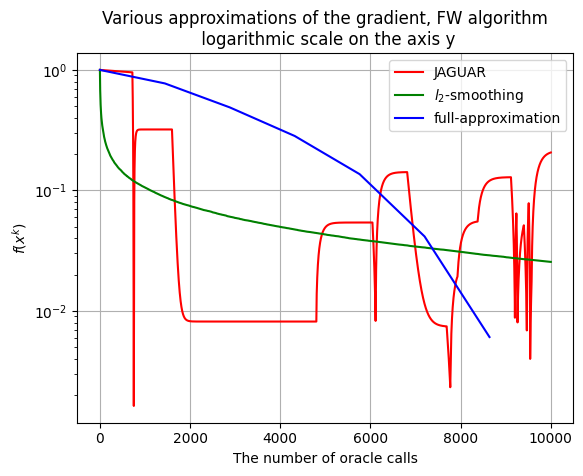

In [114]:
make_err_plot(optimizers_list, save_name="Stochastics_TPF_FW_SVM_L1_MNIST")